# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.                    
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
### The attributes are as follows: 
    Sales            -- Unit sales (in thousands) at each location
    Competitor Price -- Price charged by competitor at each location
    Income           -- Community income level (in thousands of dollars)
    Advertising      -- Local advertising budget for company at each location (in thousands of dollars)
    Population       -- Population size in region (in thousands)
    Price            -- Price company charges for car seats at each site
    Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location 
                                for the car seats at each site
    Age              -- Average age of the local population
    Education        -- Education level at each location
    Urban            -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    US               -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Data

In [2]:
raw_data = pd.read_csv('Company_Data.csv')
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Cleaning

In [3]:
raw_data['Sales'] = (raw_data['Sales'] >= 7.5).map({True : '>=7.5K', False : '<7.5K'})
raw_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,>=7.5K,138,73,11,276,120,Bad,42,17,Yes,Yes
1,>=7.5K,111,48,16,260,83,Good,65,10,Yes,Yes
2,>=7.5K,113,35,10,269,80,Medium,59,12,Yes,Yes
3,<7.5K,117,100,4,466,97,Medium,55,14,Yes,Yes
4,<7.5K,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
raw_data['Sales'].unique()

array(['>=7.5K', '<7.5K'], dtype=object)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [6]:
data = pd.get_dummies(raw_data, drop_first=True)
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_>=7.5K,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,1,0,0,1,1
1,111,48,16,260,83,65,10,1,1,0,1,1
2,113,35,10,269,80,59,12,1,0,1,1,1
3,117,100,4,466,97,55,14,0,0,1,1,1
4,141,64,3,340,128,38,13,0,0,0,1,0


In [7]:
data['Sales_>=7.5K'].unique()

array([1, 0], dtype=uint8)

# Defining Dependent and Independent Variables

In [8]:
X = data.drop('Sales_>=7.5K', axis = 1)
y = data['Sales_>=7.5K']

# Splitting the Data for Training and Testing

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = raw_data['Sales'], random_state = 42)

# Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth= 5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

# Tree Visualization

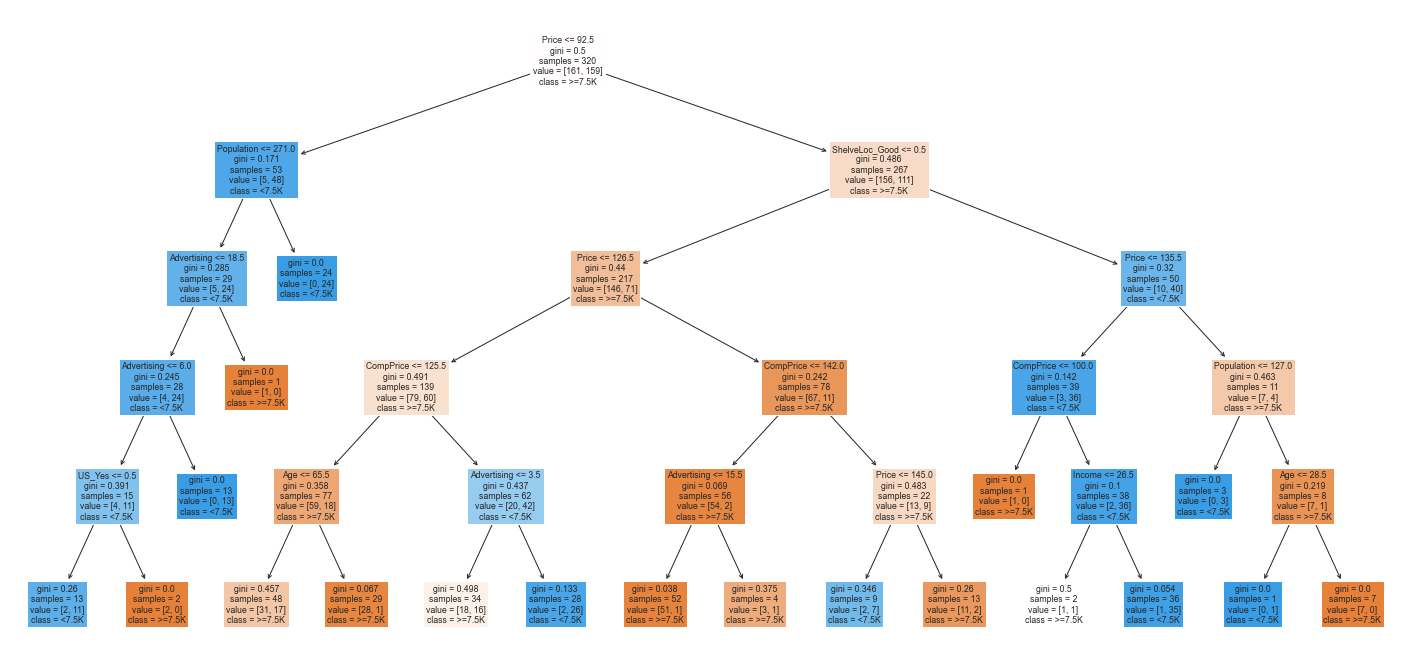

In [11]:
plt.figure(figsize=(25,12))
plot_tree(clf, feature_names=X.columns, class_names=raw_data['Sales'].unique(), filled=True)
plt.show()

# Confusion Matrix and Classification Report

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[154,   7],
       [ 39, 120]], dtype=int64)

In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       161
           1       0.94      0.75      0.84       159

    accuracy                           0.86       320
   macro avg       0.87      0.86      0.85       320
weighted avg       0.87      0.86      0.85       320



# Model Testing

In [14]:
y_test_pred = clf.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[34,  6],
       [19, 21]], dtype=int64)

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        40
           1       0.78      0.53      0.63        40

    accuracy                           0.69        80
   macro avg       0.71      0.69      0.68        80
weighted avg       0.71      0.69      0.68        80



# Decision Tree with Maximum Depth = 4

In [16]:
clf_4 = DecisionTreeClassifier(max_depth= 4)
clf_4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

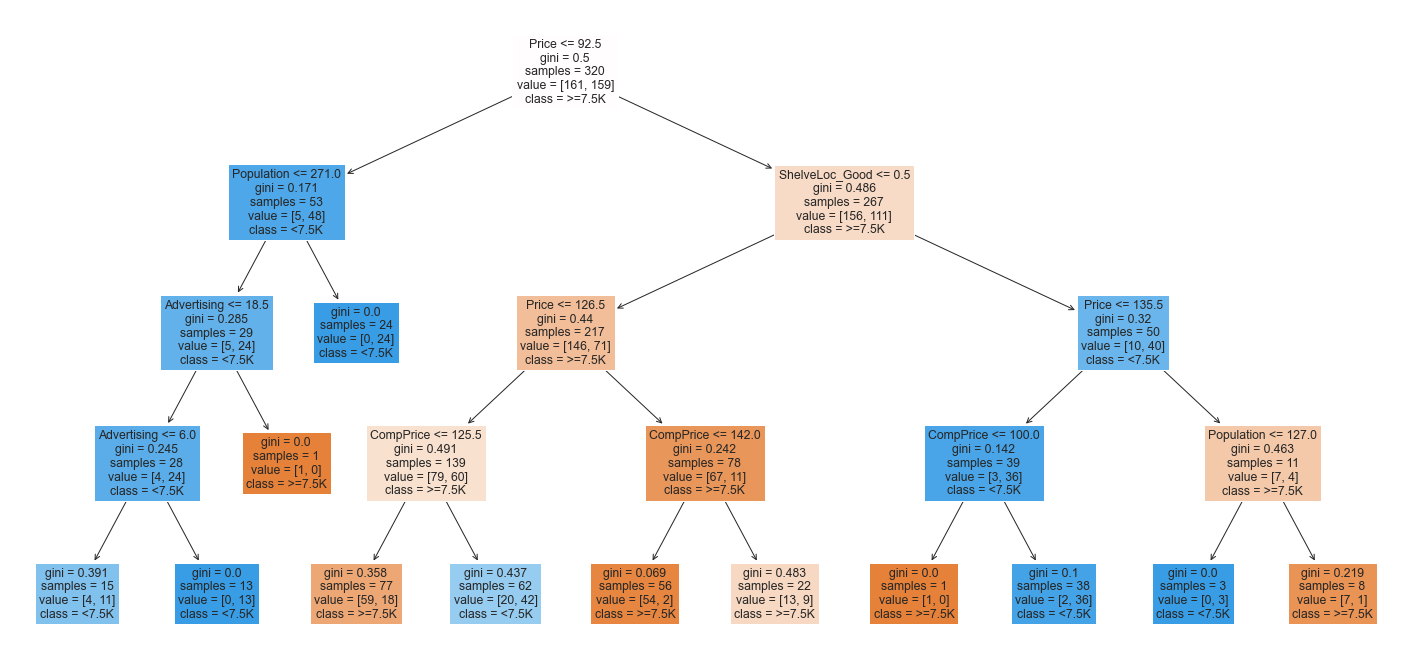

In [17]:
plt.figure(figsize=(25,12))
plot_tree(clf_4, feature_names=X.columns, class_names=raw_data['Sales'].unique(), filled=True)
plt.show()

In [19]:
y_pred_4 = clf_4.predict(x_train)
confusion_matrix(y_train, y_pred_4)

array([[135,  26],
       [ 30, 129]], dtype=int64)

In [20]:
print(classification_report(y_train, y_pred_4))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       161
           1       0.83      0.81      0.82       159

    accuracy                           0.82       320
   macro avg       0.83      0.82      0.82       320
weighted avg       0.83      0.82      0.82       320



In [21]:
y_test_pred_4 = clf_4.predict(x_test)
confusion_matrix(y_test, y_test_pred_4)

array([[35,  5],
       [15, 25]], dtype=int64)

In [22]:
print(classification_report(y_test, y_test_pred_4))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        40
           1       0.83      0.62      0.71        40

    accuracy                           0.75        80
   macro avg       0.77      0.75      0.75        80
weighted avg       0.77      0.75      0.75        80



# 

# Using Hypermarameter (Criterion = 'entropy')

In [23]:
clf_ent = DecisionTreeClassifier(max_depth= 4, criterion='entropy')
clf_ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Tree Visualization

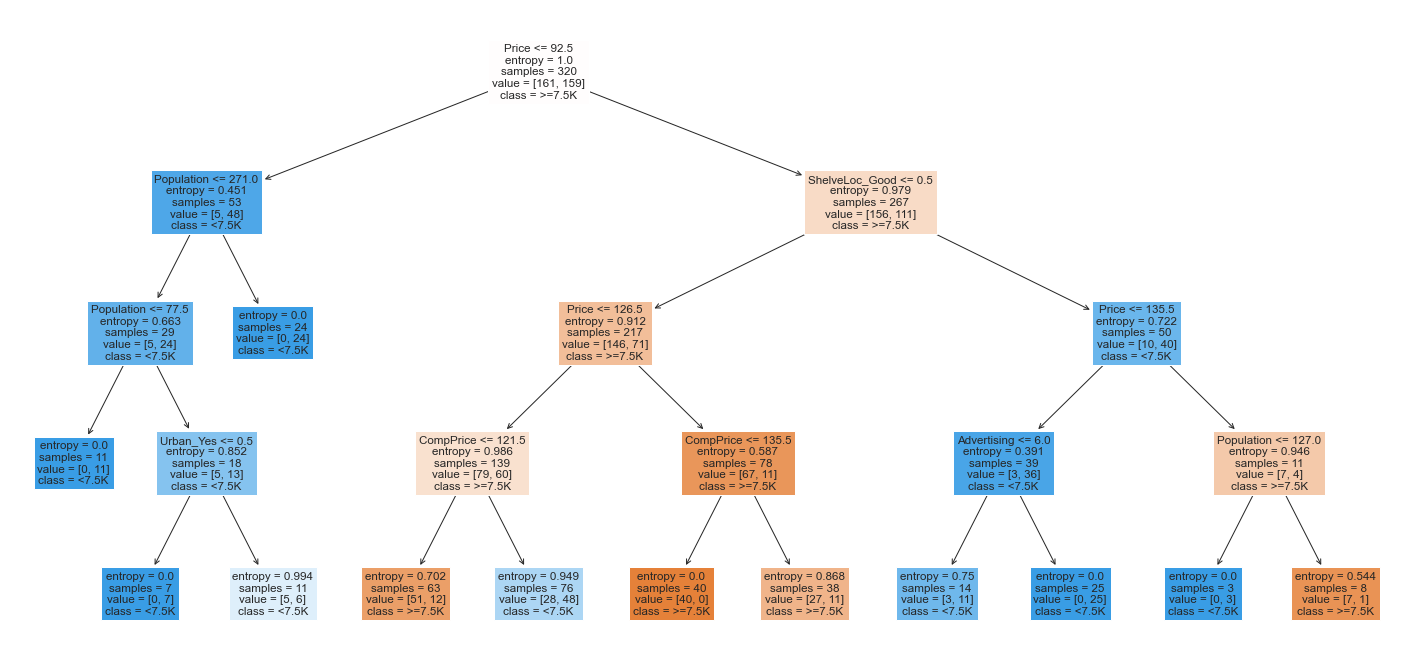

In [24]:
plt.figure(figsize=(25,12))
plot_tree(clf_ent, feature_names=X.columns, class_names=raw_data['Sales'].unique(), filled=True)
plt.show()

# Confusion Matrix and Classification Report

In [25]:
y_pred_ent = clf_ent.predict(x_train)
confusion_matrix(y_train, y_pred_ent)

array([[125,  36],
       [ 24, 135]], dtype=int64)

In [26]:
print(classification_report(y_train, y_pred_ent))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       161
           1       0.79      0.85      0.82       159

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



# Model Testing

In [27]:
y_test_pred_ent = clf_ent.predict(x_test)
confusion_matrix(y_test, y_test_pred_ent)

array([[29, 11],
       [11, 29]], dtype=int64)

In [28]:
print(classification_report(y_test, y_test_pred_ent))

              precision    recall  f1-score   support

           0       0.72      0.72      0.73        40
           1       0.72      0.72      0.73        40

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.73        80
weighted avg       0.72      0.72      0.73        80



# Both Gini Impurity and Entropy give same results